In [0]:
# Import the required modules/packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read the data file

dat = pd.read_csv( 'https://raw.githubusercontent.com/ahmadryan/MLTSA_RQudsi/master/HW1/ec1/Extra_credit_data_set.csv' )
dat.head()

,ID,x,y,sig_y,sig_x,rho_xy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33


In [7]:
dat.ID

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: ID, dtype: int64

#Exercise 1:
Using the standard linear algebra method of this Section, fit the straight line $y = m x + b$ to the x, y, and $\sigma_y$ values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the  columns for $\sigma_x$ and $\rho_{xy}$. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. What is the standard uncertainty variance $\sigma_m ^2$ on the slope of line?

# Solution

Need to solve the following equation:

$\mathbf{X} = [X^T \cdot C^{-1} \cdot X]^{-1} \cdot [X^T \cdot C^{-1} \cdot Y]$

![Expected Image from the paper](https://drive.google.com/open?id=1kx1hVDgIQ3VgQ9xFlgfbkEAh2V_iw5Jh)

In [168]:
# Prepare the matrices

x = dat.x[4:].values
y = dat.y[4:].values
s_y = dat.sig_y[4:].values

X = np.c_[np.ones((len(x), 1)), x]
C = np.zeros( [len(s_y), len(s_y)])
np.fill_diagonal(C, s_y )

best_fit = np.linalg.inv( X.T.dot(np.linalg.inv(C)).dot(X)).dot(X.T.dot(np.linalg.inv(C)).dot(y))

print ("Best fit parameters from the first data set: " + 
       "intercept = {:.2f}, slope = {:.2f}".format(*best_fit))

Best fit parameters from the first data set: intercept = 33.45, slope = 2.22


(0, 700)

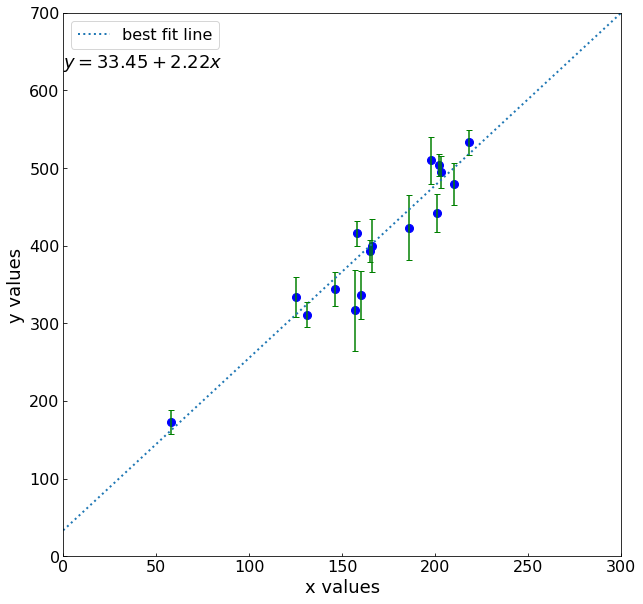

In [170]:
# Define a function to plot a line given the x-values, slope and intercept

def plotline( x, m, c, marker=None, ls=None, lw=None, label=None ):

    y = m*x + c

    ax.plot( x, y, marker=marker, ls=ls, lw=lw, label=label )

font = { 'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 10 }
plt.rc( 'font', **font )
plt.rc('text', usetex=False)

ax = plt.figure(figsize=(10,10)).add_subplot(111)

plotline( np.linspace(0, 300, 100), best_fit[1], best_fit[0], ls='-', lw=2, label='best fit line')

text = r'$y={:.2f} + {:.2f}x$'.format(*best_fit)

ax.errorbar( x, y, yerr=s_y, ls='', marker='o', c='b', ms=8, ecolor='g', capsize=3, barsabove=True )
ax.text( 0, .9, text, transform=ax.transAxes, fontsize=18)

ax.legend( fontsize=16 )

ax.tick_params( axis='both', which='both', direction='in', labelsize=16 )
ax.set_xlabel( 'x values', fontsize=18)
ax.set_ylabel( 'y values', fontsize=18)

ax.set_xlim( 0, 300 )
ax.set_ylim( 0, 700 )

In [117]:
np.std( y )/np.mean(y) * best_fit[1]

0.5116114224263538

In [118]:
np.std( s_y)/np.mean(y) * best_fit[1]

0.058390915098877325

In [133]:
np.linalg.inv( X.T.dot(np.linalg.inv(C)).dot(X)).dot(X.T.dot(np.linalg.inv(C)).dot(y))

array([252.47202852,   0.8965819 ])

In [53]:
np.shape(y)

(16,)

In [58]:
np.shape( y.T )

(16,)

#Exercise 2:

Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance $\sigma_m ^2$ on the slope of the line? Is there anything you don’t like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?

In [172]:
# Prepare the matrices

x = dat.x.values
y = dat.y.values
s_y = dat.sig_y.values

X = np.c_[np.ones((len(x), 1)), x]
C = np.zeros( [len(s_y), len(s_y)])
np.fill_diagonal(C, s_y )

best_fit = np.linalg.inv( X.T.dot(np.linalg.inv(C)).dot(X)).dot(X.T.dot(np.linalg.inv(C)).dot(y) )

print ("Best fit parameters from the first data set: " + 
       "intercept = {:.2f}, slope = {:.2f}".format(*best_fit))

Best fit parameters from the first data set: intercept = 252.47, slope = 0.90


(0, 700)

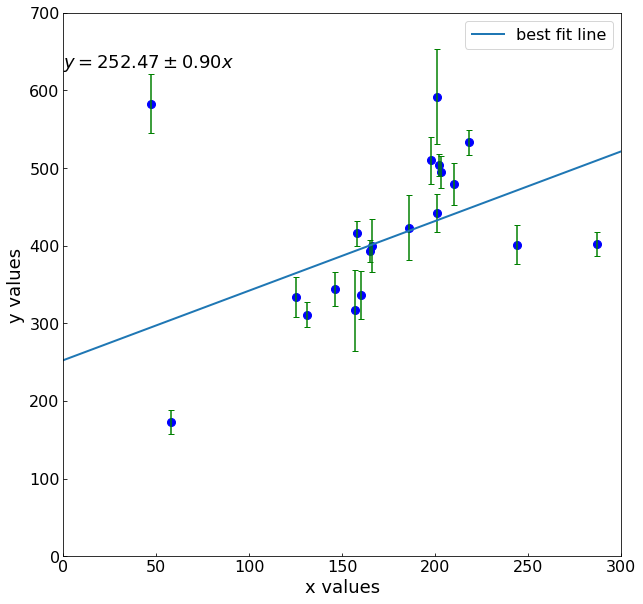

In [173]:
# Define a new plot

ax = plt.figure(figsize=(10,10)).add_subplot(111)

plotline( np.linspace(0, 300, 100), best_fit[1], best_fit[0], ls='-', lw=2, label='best fit line')

text = r'$y={:.2f} \pm {:.2f}x$'.format(*best_fit)

ax.errorbar( x, y, yerr=s_y, ls='', marker='o', c='b', ms=8, ecolor='g', capsize=3, barsabove=True )
ax.text( 0, .9, text, transform=ax.transAxes, fontsize=18)

ax.legend( fontsize=16 )

ax.tick_params( axis='both', which='both', direction='in', labelsize=16 )
ax.set_xlabel( 'x values', fontsize=18)
ax.set_ylabel( 'y values', fontsize=18)

ax.set_xlim( 0, 300 )
ax.set_ylim( 0, 700 )

#Exercise 3

In [159]:
# Prepare the matrices

x = dat.x[4:].values
y = dat.y[4:].values
s_y = dat.sig_y[4:].values

X = np.c_[np.ones((len(x), 1)), x, x**2]
C = np.zeros( [len(s_y), len(s_y)])
np.fill_diagonal(C, s_y )

best_fit = np.linalg.inv(X.T.dot(np.linalg.inv(C)).dot(X)).dot(X.T.dot(np.linalg.inv(C)).dot(y))

print ("Best fit parameters from the first data set: " + 
       "b = {:.4f}, m = {:.4f}, q = {:.4f}".format(*best_fit))

Best fit parameters from the first data set: b = 81.9286, m = 1.4469, q = 0.0027


81.9285779818747 1.446903512097606 0.002719821530298372


(0, 700)

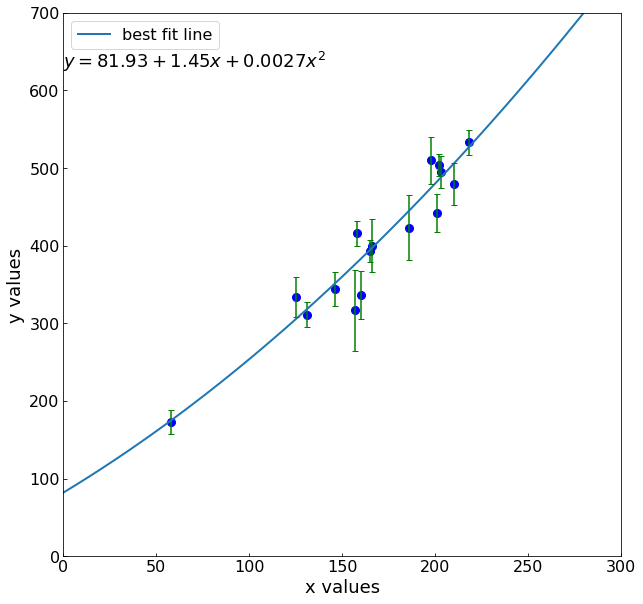

In [166]:
# Define a function to plot a parabola given the x-values, q, m and b

def plotparabola( x, b, m, q, marker=None, ls=None, lw=None, label=None ):

    print( b, m, q)
    y = q*x**2 + m*x + b

    ax.plot( x, y, marker=marker, ls=ls, lw=lw, label=label )

font = { 'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 10 }
plt.rc( 'font', **font )
plt.rc('text', usetex=False)

ax = plt.figure(figsize=(10,10)).add_subplot(111)

plotparabola( np.linspace(0, 300, 100), best_fit[0], best_fit[1], best_fit[2], ls='-', lw=2, label='best fit line')

text = r'$y={:.2f} + {:.2f} x+ {:.4f}x^2$'.format(*best_fit)

ax.errorbar( x, y, yerr=s_y, ls='', marker='o', c='b', ms=8, ecolor='g', capsize=3, barsabove=True )
ax.text( 0, .9, text, transform=ax.transAxes, fontsize=18)

ax.legend( fontsize=16 )

ax.tick_params( axis='both', which='both', direction='in', labelsize=16 )
ax.set_xlabel( 'x values', fontsize=18)
ax.set_ylabel( 'y values', fontsize=18)

ax.set_xlim( 0, 300 )
ax.set_ylim( 0, 700 )

In [157]:
best_fit

array([8.19285780e+01, 1.44690351e+00, 2.71982153e-03])